## API Access Homework
DATAPRE S14

Members:
<br>Bautista, Carlo Gabriel V.
<br>Canicon, Jan Ambro P.

### Small Notes about API and preprocessing
It seems that PSAW does not return completely accurate details of posts, or is inconsistent. For example, the post may be actually removed, but is not flagged as *removed* by the API in `selftext` and in `removed_by_category`. [Example](https://www.reddit.com/r/anime/comments/v2vfad/anime_that_makes_you_feel_emptydead_inside_lol/), with code to demonstrate in the following cell. In contrast, there are other posts the are actually removed and are flagged *removed* in the previously mentioned attributes. [Another example](https://www.reddit.com/r/anime/comments/v2u0gh/early_2000s90s_anime/), with the matching code in the following cell. This serves as a disclaimer that the preprocessing, while applying the correct methods, might not be complete.

Additionally, these removed posts that still have `selftext` have somewhat buggy content, for example: [this post](https://www.reddit.com/r/anime/comments/v516xw/this_guy_has_a_pfp_of_an_anime_character_does/). These posts have "random" substrings popping up ("&amp;#x200B;" in this case), which we could not think of a way to reliably clean.

In [5]:
# Skip if not checking for cell above
from psaw import PushshiftAPI
api = PushshiftAPI()

urls = [
    'https://www.reddit.com/r/anime/comments/v2vfad/anime_that_makes_you_feel_emptydead_inside_lol/',
    'https://www.reddit.com/r/anime/comments/v2u0gh/early_2000s90s_anime/',
    'https://www.reddit.com/r/anime/comments/v516xw/this_guy_has_a_pfp_of_an_anime_character_does/'
]

for url in urls:
    invalid = api.search_submissions(url=url)

    invalid = [thing.d_ for thing in invalid]
    invalid = invalid[0]

    print('-----full_link-----')
    print(invalid['full_link'])
    print('\n-----selftext-----')
    print(invalid['selftext'])
    print('\n-----removed_by_category-----')
    try:
        print(invalid['removed_by_category'], '\n')
    except:
        print('Attribute [removed_by_category] is null (NaN).\n')

C:\Users\carlo\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


-----full_link-----
https://www.reddit.com/r/anime/comments/v2vfad/anime_that_makes_you_feel_emptydead_inside_lol/

-----selftext-----

looking for suggestions similar to -

fullmetal alchemist/brotherhood
attack on titan
deathnote
black lagoon 
cowboy bebop
samurai champloo(kind of) 
naruto


not asking in a depressing way, i just find the darker and more emotional the anime the more i get invested into it. 

i cant say im a fan of big mechs or over the top superpowers/magic (there are exceptions tho)
Preferably in eng dubs

-----removed_by_category-----
Attribute [removed_by_category] is null (NaN).

-----full_link-----
https://www.reddit.com/r/anime/comments/v2u0gh/early_2000s90s_anime/

-----selftext-----
[removed]

-----removed_by_category-----
moderator 

-----full_link-----
https://www.reddit.com/r/anime/comments/v516xw/this_guy_has_a_pfp_of_an_anime_character_does/

-----selftext-----
&amp;#x200B;

https://preview.redd.it/txpb3951zo391.png?width=84&amp;format=png&amp;auto=webp&

## Libary Imports

In [7]:
from psaw import PushshiftAPI
import pandas as pd
from datetime import datetime
import validators
import re

api = PushshiftAPI()

## API Data Collection

In [8]:
# Select Subreddit
sub="anime"

# Select Start Date
start="2022-06-01"

start_date=pd.to_datetime(start)
start_epoch=int(start_date.timestamp())

# Select End Date
end="2022-06-05"

end_date=pd.to_datetime(end)
end_epoch=int(end_date.timestamp())

params = [
    'full_link', 'subreddit', 'created_utc', 'author',
    'title', 'selftext', 'removed_by_category'
]

posts = api.search_submissions(limit=300, 
                               subreddit=sub, 
                               after=start_epoch,
                               before=end_epoch,
                               sort_by='popularity',
                               filter=params)

# Converting to DataFrame
posts_df = pd.DataFrame([thing.d_ for thing in posts])

#Converting created
posts_df['created'] = [datetime.fromtimestamp(i).strftime("%A, %B %d, %Y %I:%M:%S") for i in posts_df['created']]

#Converting created_utc - Coordinated Universal Time
posts_df['created_utc'] = [datetime.fromtimestamp(i).strftime("%A, %B %d, %Y %I:%M:%S") for i in posts_df['created_utc']]
posts_df

,author,created_utc,full_link,selftext,subreddit,title,created,removed_by_category
0,yuyuki44,"Sunday, June 05, 2022 07:57:58",https://www.reddit.com/r/anime/comments/v51ced...,,anime,The Pretty brides of the 4th Primogenitor [Str...,"Saturday, June 04, 2022 11:57:58",NaN
1,Fit_Singer1777,"Sunday, June 05, 2022 07:48:56",https://www.reddit.com/r/anime/comments/v516xw...,&amp;#x200B;\n\nhttps://preview.redd.it/txpb39...,anime,"This guy has a pfp of an anime character, does...","Saturday, June 04, 2022 11:48:56",NaN
2,littleshorthanded,"Sunday, June 05, 2022 07:46:28",https://www.reddit.com/r/anime/comments/v515ic...,,anime,Does anyone know which one this is from? I can...,"Saturday, June 04, 2022 11:46:28",moderator
3,Ella_Dynes,"Sunday, June 05, 2022 07:45:07",https://www.reddit.com/r/anime/comments/v514oe...,,anime,"Do you agree or disagree with lights concept, ...","Saturday, June 04, 2022 11:45:07",moderator
4,No_Necessary_9377,"Sunday, June 05, 2022 07:44:36",https://www.reddit.com/r/anime/comments/v514er...,,anime,ayúdenme mandándole mensaje,"Saturday, June 04, 2022 11:44:36",moderator
...,...,...,...,...,...,...,...,...
295,Kingcledus69,"Saturday, June 04, 2022 01:17:42",https://www.reddit.com/r/anime/comments/v4hvq6...,,anime,Choosing your fantasy - StrawPoll,"Saturday, June 04, 2022 05:17:42",NaN
296,potatosarewatching,"Saturday, June 04, 2022 01:16:18",https://www.reddit.com/r/anime/comments/v4hv0a...,"The first arc especially, is all about the opp...",anime,The Irregular at Magic Highschool is propaganda!,"Saturday, June 04, 2022 05:16:18",NaN
297,alinedalvi_art,"Saturday, June 04, 2022 12:49:23",https://www.reddit.com/r/anime/comments/v4hg20...,[removed],anime,[OC Fanart] Yor Forger from Spy x Family,"Saturday, June 04, 2022 04:49:23",moderator
298,mr_cyb3rz,"Saturday, June 04, 2022 12:48:58",https://www.reddit.com/r/anime/comments/v4hftq...,,anime,Sakuga Doja Cat You Right MAD/AMV,"Saturday, June 04, 2022 04:48:58",NaN


## Data Preprocessing

In [9]:
print(posts_df.shape[0], 'posts to be filtered.\n')

# Remove blank posts
blanks = posts_df[posts_df['selftext'] == ''].index
posts_df.drop(blanks, inplace=True)
print(len(blanks), 'blank posts dropped.')

# Remove "blank" posts (link-only)
# If the whole text is a url, then it is a "blank" link-only post
links_only = posts_df[posts_df['selftext'].apply(validators.url) == True].index
posts_df.drop(links_only, inplace=True)
print(len(links_only), 'link-only posts dropped.')

# MARKER 1

# Drop posts removed by moderators
removed = posts_df[posts_df['removed_by_category'].notnull()].index
posts_df.drop(removed, inplace=True)
print(len(removed), 'moderator-removed posts dropped.')

# Remove deleted posts (Appears to be the same as removed_by_category)
# Was in place of [MARKER 1], reverses removed posts with previous step
deleted = posts_df[posts_df['selftext'] == '[removed]'].index
posts_df.drop(deleted, inplace=True)
print(len(deleted), 'removed posts dropped.')

print('\n', posts_df.shape[0], 'posts left after cleaning.')

300 posts to be filtered.

129 blank posts dropped.
1 link-only posts dropped.
41 moderator-removed posts dropped.
0 removed posts dropped.

 129 posts left after cleaning.


In [10]:
# Converts post to lowercase
posts_df['Preprocessed post'] = posts_df['selftext'].apply(str.lower)

# Generalizes URLs
def replace_url(text):
    return re.sub(r'http\S+', 'isURL', text)
posts_df['Preprocessed post'] = posts_df['Preprocessed post'].apply(lambda x: replace_url(x))

# Cleans symbols from lowercase selftext
def remove_symbols(text):
    return re.sub(r'[^\w\s]', '', text)
posts_df['Preprocessed post'] = posts_df['Preprocessed post'].apply(lambda x: remove_symbols(x))

# Re-drops posts that only contain a URL
def is_only_url(text):
    words = text.split()
    for word in words:
        if(word != 'isURL'):
            return False
    # If loop finishes without finding a word that is not 'isURL', then whole text is only a URL
    return True
links_only = posts_df[posts_df['Preprocessed post'].apply(lambda x: is_only_url(x)) == True].index
posts_df.drop(links_only, inplace=True)
print(len(links_only), 'additional link-only posts dropped.')

4 additional link-only posts dropped.


## Analysis — Word Counting
Note: Stop words were not excluded from counting.

In [11]:
words = posts_df['Preprocessed post'].apply(str.split)
words = pd.DataFrame(words.explode()).reset_index().drop(columns='index')
words_df = pd.DataFrame(
    words.groupby('Preprocessed post').size(), columns=['Word Count']).sort_values(
    'Word Count', ascending=False)
words_df

,Word Count
Preprocessed post,
the,530
and,324
to,303
i,289
a,255
...,...
harbors,1
harboring,1
harbored,1


## Visualization
For the sake of visibility and execution time, the bar graph was limited to the top 50 most occuring words.

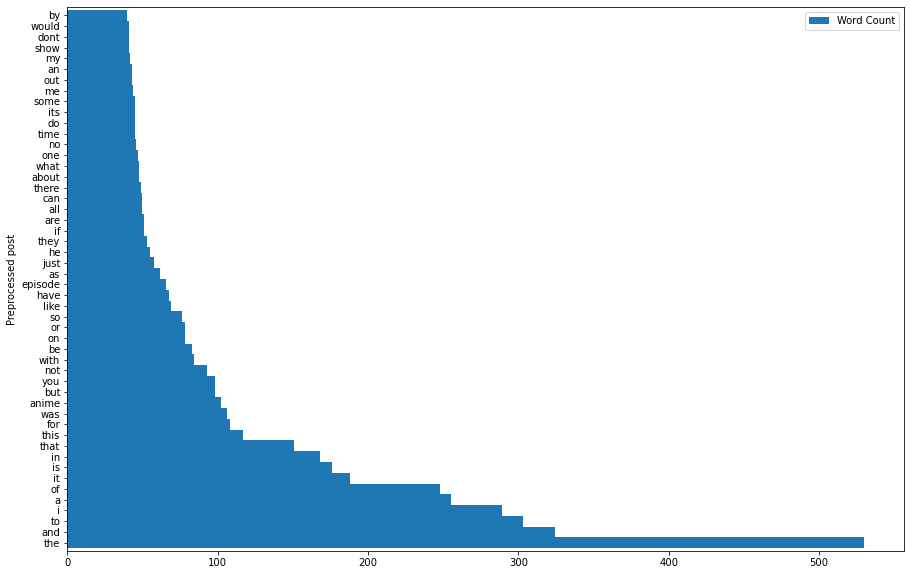

In [12]:
ax = words_df.drop(words_df.index[50:]).plot.barh(y='Word Count', figsize=(15, 10), stacked=True, width=1)

In [28]:
words

,Preprocessed post
0,ampx200b
1,isURL
2,what
3,do
4,yall
...,...
13521,status
13522,quo
13523,in
13524,their


In [29]:
import json
file = open("Bautista_Canicon_reddit.json", "w")
result = posts_df.to_json(orient="values")
parsed = json.loads(result)
json.dump(parsed, file, indent=4)
file.close()

In [30]:
pd.read_json('Bautista_Canicon_reddit.json')

,0,1,2,3,4,5,6,7,8
0,Fit_Singer1777,"Sunday, June 05, 2022 07:48:56",https://www.reddit.com/r/anime/comments/v516xw...,&amp;#x200B;\n\nhttps://preview.redd.it/txpb39...,anime,"This guy has a pfp of an anime character, does...","Saturday, June 04, 2022 11:48:56",NaN,ampx200b\n\nisURL
1,Bunkbedboi,"Sunday, June 05, 2022 07:43:21",https://www.reddit.com/r/anime/comments/v513md...,What do y'all think about Harems in anime/mang...,anime,What do you think?,"Saturday, June 04, 2022 11:43:21",NaN,what do yall think about harems in animemanga ...
2,fapping_giraffe,"Sunday, June 05, 2022 07:40:18",https://www.reddit.com/r/anime/comments/v511q3...,I've noticed that certain anime takes itself e...,anime,"What other kind of anime ""takes it self seriou...","Saturday, June 04, 2022 11:40:18",NaN,ive noticed that certain anime takes itself ex...
3,MannerPots,"Sunday, June 05, 2022 07:25:57",https://www.reddit.com/r/anime/comments/v50sc8...,The [subreddit watch order guide](https://old....,anime,What's the up to date watch order for Free!?,"Saturday, June 04, 2022 11:25:57",NaN,the subreddit watch order guideisURL for free ...
4,gorillionaire2022,"Sunday, June 05, 2022 07:16:44",https://www.reddit.com/r/anime/comments/v50m6b...,the clip showed some type of military/police f...,anime,QUESTION/HELP...title of anime that I saw a cl...,"Saturday, June 04, 2022 11:16:44",NaN,the clip showed some type of militarypolice fo...
...,...,...,...,...,...,...,...,...,...
120,WhatAGuy59,"Saturday, June 04, 2022 02:20:41",https://www.reddit.com/r/anime/comments/v4isz3...,"For some specifics, they were two ancient sam...",anime,Looking for name of an emotional BL anime with...,"Saturday, June 04, 2022 06:20:41",NaN,for some specifics they were two ancient samu...
121,ziomek1234567890,"Saturday, June 04, 2022 02:04:11",https://www.reddit.com/r/anime/comments/v4ikgz...,is it true that the story of twin stars miyaza...,anime,Twin stars Kenji miyazawa,"Saturday, June 04, 2022 06:04:11",NaN,is it true that the story of twin stars miyaza...
122,DotGlobal8483,"Saturday, June 04, 2022 01:29:21",https://www.reddit.com/r/anime/comments/v4i204...,"Like some people question""WeLl RaChEl SaYs Sh...",anime,What i dont understand about angel of death co...,"Saturday, June 04, 2022 05:29:21",NaN,like some people questionwell rachel says she...
123,Appropriate_Care_769,"Saturday, June 04, 2022 01:22:42",https://www.reddit.com/r/anime/comments/v4hyfu...,While rewatching Erased I felt like something ...,anime,Help me remember what this anime is called ple...,"Saturday, June 04, 2022 05:22:42",NaN,while rewatching erased i felt like something ...
